In [41]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('concrete_data.csv')

In [43]:
df.head()

,Unnamed: 0,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [44]:
df.drop(df.columns[0], axis=1, inplace=True)

In [45]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [46]:
X = df.drop(df.columns[-1], axis=1)
y = df[[df.columns[-1]]] # df.columns je niz imena kolona, df.columns[-1] je poslednja kolona, df[[kolona1, kolonan]] izdvaja DataFrame koji sadrzi sve redove na vedenih kolona [kolona1, kolonan]

In [47]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [48]:
y.head()

,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train_stats = X_train.describe().transpose()
X_train_stats

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),824.0,283.358471,107.537319,102.00,192.000,275.07,359.900,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),824.0,74.371177,86.977542,0.00,0.000,22.00,144.775,359.4
Fly Ash (component 3)(kg in a m^3 mixture),824.0,53.159648,64.000172,0.00,0.000,0.00,118.270,195.0
Water (component 4)(kg in a m^3 mixture),824.0,181.796408,21.323410,121.75,164.900,185.35,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),824.0,6.162243,5.967055,0.00,0.000,6.13,10.115,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),824.0,973.548155,78.694529,801.00,932.000,968.00,1040.600,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),824.0,772.105789,80.984154,594.00,726.775,778.45,821.250,992.6
Age (day),824.0,44.661408,60.475702,1.00,12.250,28.00,56.000,365.0


In [51]:
def norm(x):
    return (x - X_train_stats['mean']) / X_train_stats['std']

In [52]:
X_train_normed = norm(X_train)
X_test_normed = norm(X_test)

In [53]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(X_train_normed.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), 
                 loss='mse', metrics=['mse', 'mae'])
    return model

In [54]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X_train_normed, y_train, epochs=32, validation_split=0.2)

Epoch 1/32
21/21 [==============================] - 1s 8ms/step - loss: 1506.4165 - mse: 1506.4165 - mae: 34.7776 - val_loss: 1442.8413 - val_mse: 1442.8413 - val_mae: 34.7516
Epoch 2/32
21/21 [==============================] - 0s 2ms/step - loss: 1425.1190 - mse: 1425.1190 - mae: 33.5850 - val_loss: 1355.4379 - val_mse: 1355.4379 - val_mae: 33.4625
Epoch 3/32
21/21 [==============================] - 0s 2ms/step - loss: 1326.1976 - mse: 1326.1976 - mae: 32.0553 - val_loss: 1243.0500 - val_mse: 1243.0500 - val_mae: 31.7349
Epoch 4/32
21/21 [==============================] - 0s 2ms/step - loss: 1201.0110 - mse: 1201.0110 - mae: 30.0199 - val_loss: 1106.1222 - val_mse: 1106.1222 - val_mae: 29.4837
Epoch 5/32
21/21 [==============================] - 0s 2ms/step - loss: 1047.9794 - mse: 1047.9794 - mae: 27.4179 - val_loss: 938.5194 - val_mse: 938.5194 - val_mae: 26.5825
Epoch 6/32
21/21 [==============================] - 0s 2ms/step - loss: 875.4721 - mse: 875.4721 - mae: 24.3729 - val_loss

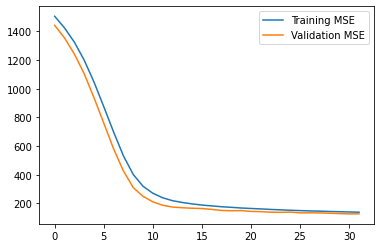

In [56]:
plt.plot(history.epoch, history.history['mse'])
plt.plot(history.epoch, history.history['val_mse'])
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()

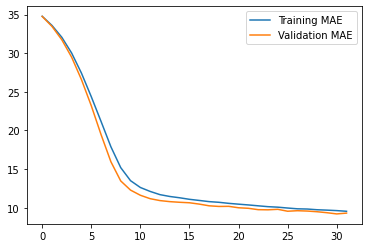

In [57]:
plt.plot(history.epoch, history.history['mae'])
plt.plot(history.epoch, history.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()

In [58]:
model.evaluate(X_test_normed, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 122.8312 - mse: 122.8312 - mae: 9.1822


[122.83123779296875, 122.83123779296875, 9.182183265686035]

# Za vezbu:
Smanjti MSE i MAE:
1. Slozenijim/Prostijim modelom
2. Vecim brojem epoha za treniranje
3. Izbacivanjem nekih kolona

Dodati da se treniranje zaustavi ukoliko se `mse` i `val_mse` ne menja previse u 20 uzastopnih iteracija.